##Decision Trees and Random Forest with Python

An increased front-to-back curve of the spine is called kyphosis. Kyphosis is an exaggerated, forward rounding of the upper back. In older people, kyphosis is often due to weakness in the spinal bones that causes them to compress or crack.

In [ ]:
url = "https://raw.githubusercontent.com/OGamer16/kyphosis1/main/kyphosis%20(1).csv"


In [ ]:
import os
os.environ.setdefault('PATH', '')

'/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv(url, index_col=0)

# Display the first few rows of the DataFrame
print(df.head())

         Kyphosis  Age  Number  Start
rownames                             
1          absent   71       3      5
2          absent  158       3     14
3         present  128       4      5
4          absent    2       5      1
5          absent    1       4     15


In [ ]:
df.head()

,Kyphosis,Age,Number,Start
rownames,,,,
1,absent,71,3,5
2,absent,158,3,14
3,present,128,4,5
4,absent,2,5,1
5,absent,1,4,15


# Description
The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery

# Usage
kyphosis
# Format:
#This data frame contains the following columns:
# Kyphosis
* a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.

#Age
in months

#Number
the number of vertebrae involved

#Start
the number of the first (topmost) vertebra operated on.

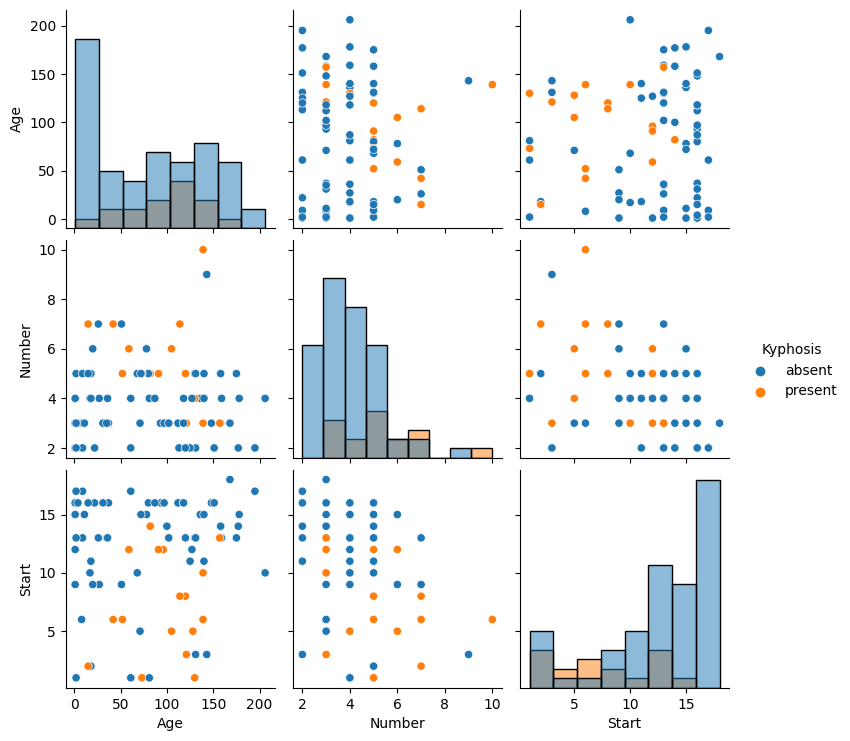

In [ ]:
#sns.pairplot(df);
sns.pairplot(df, hue="Kyphosis", diag_kind="hist");
plt.show()

# Train Test Split

The train-test split is a common technique in machine learning for evaluating the performance of a model. The idea is to split your dataset into two subsets: one for training the model and another for testing the model's performance. The training set is used to train the model, while the test set is used to evaluate its performance on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop("Kyphosis", axis=1)
y=df['Kyphosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Decision tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

A Decision Tree Classifier is a type of supervised machine learning algorithm that is used for both classification and regression tasks. In the context of classification, the algorithm builds a tree-like structure where each internal node represents a decision based on the values of one of the input features. The leaves of the tree represent the class labels.

Here's a breakdown of how a Decision Tree Classifier works:

#Decision Tree Structure:

1.   Root Node:
* The topmost node in the tree is called the root node.
* It represents the entire dataset and is split into two or more homogeneous sets.

2.  Internal Nodes:
* Nodes that follow the root node are called internal nodes.
* Each internal node represents a decision based on the value of one of the input features.

3. Leaves:
* Nodes at the bottom of the tree are called leaves or terminal nodes.
* Each leaf node represents a class label.

# Decision Making Process:
1. Feature Selection:

* The algorithm selects the feature that best splits the data into homogeneous sets. The goal is to minimize impurity or maximize information gain.
* Various criteria such as Gini impurity, entropy, or mean squared error are used to measure impurity.

2. Splitting:
* The selected feature is used to split the dataset into subsets based on its values.
* The process is repeated recursively for each subset.

3. Stopping Criteria:
* The recursion continues until a stopping criteria is met, such as a maximum depth, a minimum number of samples in a leaf, or impurity reaching a threshold.
* These criteria prevent the tree from becoming too complex and overfitting the training data.

# Prediction:
* To make a prediction for a new data point, the algorithm traverses the tree from the root to a leaf node based on the feature values of the data point.
* The predicted class is the majority class of the training samples in that leaf.

5. Advantages of Decision Trees:
* Interpretability: Decision trees are easy to understand and interpret. The rules used for prediction are explicit and can be visualized.
* No Assumption about Data Distribution: Decision trees make no assumption about the distribution of data.
* Handles Both Numerical and Categorical Data: Decision trees can handle both numerical and categorical data.

# Disadvantages of Decision Trees:
* Overfitting: Decision trees can easily overfit the training data, capturing noise and specific patterns that do not generalize well to new data.

# Instability:
* Small changes in the data can result in a completely different tree structure.

# Bias towards Dominant Classes:
* In datasets with imbalanced class distribution, decision trees tend to be biased toward the dominant classe

# Prediction and Evalutation

In [ ]:
pred = dtc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      absent       0.77      0.81      0.79        21
     present       0.20      0.17      0.18         6

    accuracy                           0.67        27
   macro avg       0.49      0.49      0.49        27
weighted avg       0.65      0.67      0.66        27



The metrics provided in the output are commonly used in classification evaluation. Let's break down each metric:

1. **Precision:**
   - Precision is the ratio of correctly predicted positive observations to the total predicted positives.
   - For the "absent" class, the precision is 0.80, meaning that 80% of the instances predicted as "absent" were correct.
   - For the "present" class, the precision is 0.29, indicating that only 29% of the instances predicted as "present" were correct.

2. **Recall (Sensitivity or True Positive Rate):**
   - Recall is the ratio of correctly predicted positive observations to the all observations in the actual class.
   - For the "absent" class, the recall is 0.76, meaning that 76% of the actual "absent" instances were correctly predicted.
   - For the "present" class, the recall is 0.33, indicating that only 33% of the actual "present" instances were correctly predicted.

3. **F1-Score:**
   - The F1-Score is the weighted average of precision and recall. It is a metric that considers both false positives and false negatives.
   - For the "absent" class, the F1-Score is 0.78.
   - For the "present" class, the F1-Score is 0.31.

4. **Support:**
   - Support represents the number of actual occurrences of the class in the specified dataset.
   - For the "absent" class, the support is 21.
   - For the "present" class, the support is 6.

5. **Accuracy:**
   - Overall accuracy is the ratio of correctly predicted instances to the total instances.
   - The overall accuracy is 0.67 or 67%, meaning that 67% of all instances were correctly classified.

6. **Macro Average:**
   - Macro average is the average of the metrics (precision, recall, F1-score) for each class, without considering class imbalance.
   - The macro-average precision is 0.54, recall is 0.55, and F1-score is 0.54.

7. **Weighted Average:**
   - Weighted average considers the number of samples for each class, providing more weight to the class with more instances.
   - The weighted average precision is 0.69, recall is 0.67, and F1-score is 0.68.

In summary, these metrics provide a comprehensive evaluation of the classification model's performance for each class and overall. The interpretation of these metrics depends on the specific context of the problem, and trade-offs between precision and recall should be considered based on the application requirements.

In [ ]:
print(confusion_matrix(y_test, pred))

[[17  4]
 [ 5  1]]


# Tree Vizualization

In [ ]:
import io
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from io import StringIO



# Create a Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Fit the model to the training data
dtc.fit(X_train, y_train)

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

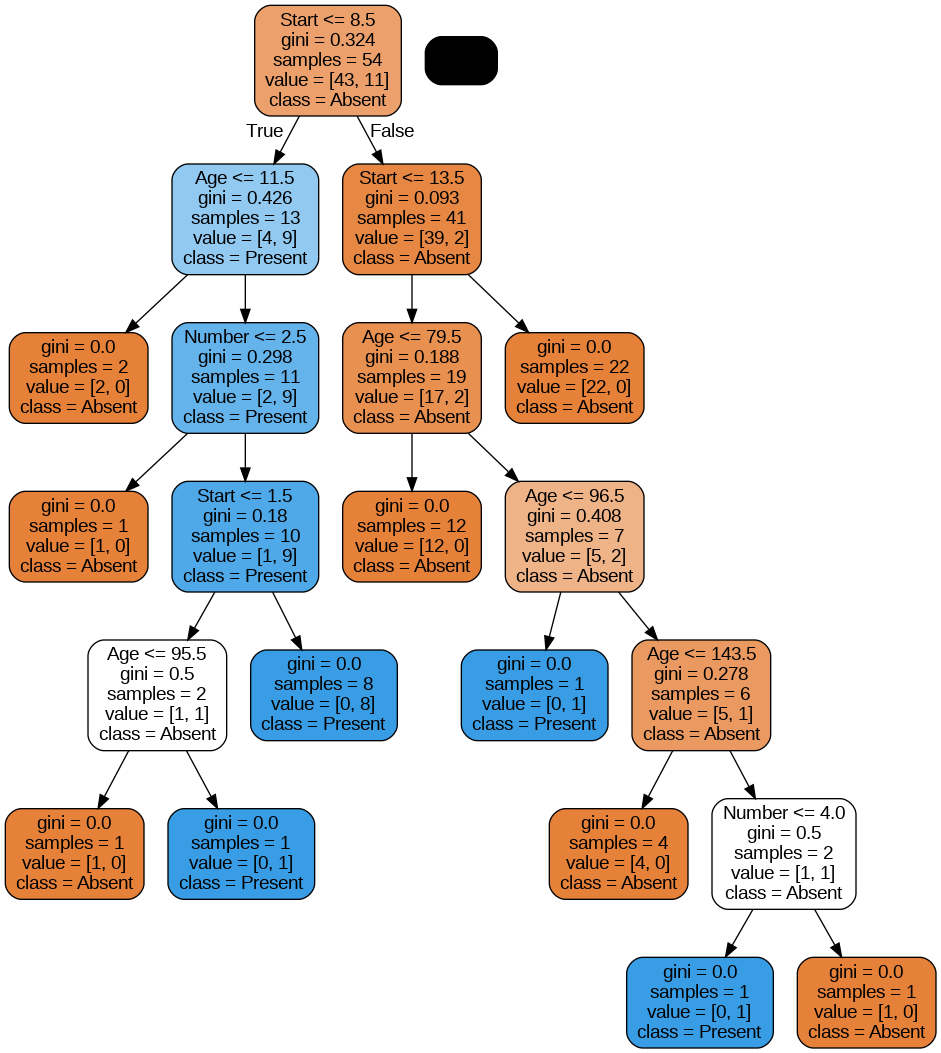

In [ ]:
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, feature_names=X.columns, class_names=['Absent', 'Present'], filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]

# Use create_png() directly
png_bytes = graph.create_png()
Image(png_bytes)

# Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rfc_pred=rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.83      0.95      0.89        21
     present       0.67      0.33      0.44         6

    accuracy                           0.81        27
   macro avg       0.75      0.64      0.67        27
weighted avg       0.80      0.81      0.79        27



Let's interpret the updated metrics:

1. **Precision:**
   - For the "absent" class, precision has increased to 0.83, indicating that 83% of instances predicted as "absent" were correct.
   - For the "present" class, precision is now 0.67, meaning that 67% of instances predicted as "present" were correct.

2. **Recall (Sensitivity or True Positive Rate):**
   - For the "absent" class, recall has increased to 0.95, indicating that 95% of actual "absent" instances were correctly predicted.
   - For the "present" class, recall is now 0.33, indicating that 33% of actual "present" instances were correctly predicted.

3. **F1-Score:**
   - For the "absent" class, the F1-Score is 0.89, which is a weighted average of precision and recall.
   - For the "present" class, the F1-Score has increased to 0.44.

4. **Support:**
   - The support remains the same, representing the number of actual occurrences of each class in the specified dataset.

5. **Accuracy:**
   - Overall accuracy has increased to 0.81 or 81%, meaning that 81% of all instances were correctly classified.

6. **Macro Average:**
   - The macro-average precision is now 0.75, recall is 0.64, and F1-score is 0.67.

7. **Weighted Average:**
   - The weighted average precision is 0.80, recall is 0.81, and F1-score is 0.79.

In summary, the updated metrics indicate an improvement in the model's performance, especially for the "absent" class. The precision for "absent" increased, and the recall for both classes also improved. The F1-Score, which considers both precision and recall, has also increased for both classes. The overall accuracy has improved, and the weighted average metrics provide a balanced assessment, considering the class distribution. These improvements suggest that the model is making more accurate predictions after the update.

In [ ]:
print(confusion_matrix(y_test, rfc_pred))

[[20  1]
 [ 4  2]]
